# Hand of God Code 2.0 
## Hanan Basheer (20B030018)
## Sidhant Bose (200020140) little bit
## Vinayak Goyal (20d070088) little bit


### Installing required dependencies and modules

In [135]:
import subprocess

def install(name):
    subprocess.call(['pip', 'install', name])

install("matplotlib sklearn tk seaborn pandas serial mouse keyboard")

# Restart Notebook after installations are complete

### Importing required libraries

In [136]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np
import os
import seaborn as sns
import pandas as pd
import csv
import serial
import time
#import keyboard
#import mouse
import warnings
import turtle
from tkinter import *
from PIL import Image, ImageTk
from Graphics import Animations
warnings.filterwarnings('ignore')

### Global Variable definition

In [137]:
push = 0  # Thumb button to push buffer commands through
dt = 0.1
data_list = []

### Arduino Object Creation

In [138]:
# arduino = serial.Serial('COM3', 9600, timeout = dt)

### Interface (Button functions)

In [139]:
def fun1():  # Record Hand Gesture
    root = Tk()
    root.title("Record Hand Gesture")
    root.geometry('500x300')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    def record_gesture_fun():
        avg_list = [0, 0, 0, 0]
        for i in range(100):
            data = "100/200/300/400/500/600/700/800/"  #arduino.readline()
            if (data):
                data = list(map(eval,str(data)[2:-5].split("/")))[0:4]
                data_list.append(data)
                for j in range(len(data)):
                    avg_list[j] += data[j]
                outputs.insert(END, "   Outputs at t = " + str(round(dt * i, 2)) + " is " + str(data))
        avg = [round(x / len(data_list), 1) for x in avg_list]
        output_label = Label(root, text = "Average Voltage Values").place(x = 115, y = 30, relx = 0.5, rely = 0.5, anchor = CENTER)
        output = Label(root, text = str(avg)).place(x = 115, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)

    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    entry = Entry(parent)
    entry.place(x = 115, y = -50, relx = 0.5, rely = 0.5, anchor = CENTER)

    def store_gesture_fun():
        action_name = entry.get()
        if (action_name):
            with open(os.getcwd() + '\\Vol-Ges.csv', 'a', encoding='UTF8', newline='') as f:
                writer = csv.writer(f)
                for i in data_list:
                    z = i + [action_name]
                    writer.writerow(z)
            store_label = Label(root, text = "Gesture stored  successfully !", font=("Arial", 10), height = 5, fg = "#00b894").place(x = 115, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 40)    
    outputs.pack(side = LEFT, fill = Y)
    scroll_bar.config(command = outputs.yview)
    record_button = Button(parent, text='RECORD', command = record_gesture_fun, bg = "#ff7675").place(x = 80, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    store_button = Button(parent, text='STORE', command = store_gesture_fun, bg = "#6c5ce7").place(x = 150, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()

In [140]:
def fun2():  # Record Command (Sequencing)
    root = Tk()
    root.title("Record Command (Sequencing)")
    root.geometry('500x500')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    def record_gesture_fun():
        avg_list = [0, 0, 0, 0]
        for i in range(100):
            data = "1/2/3/4/5/6/7/8/"  #arduino.readline()
            if (data):
                data = list(map(eval,str(data)[2:-5].split("/")))[0:4]
                data_list.append(data)
                for j in range(len(data)):
                    avg_list[j] += data[j]
                outputs.insert(END, "   Outputs at t = " + str(round(dt * i, 2)) + " is " + str(data))
        avg = [x / len(data_list) for x in avg_list]
        output_label = Label(root, text = "Average Voltage Values").place(x = 75, y = 30, relx = 0.5, rely = 0.5, anchor = CENTER)
        output = Label(root, text = str(avg)).place(x = 75, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)

    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    entry = Entry(parent)
    entry.place(x = 75, y = -50, relx = 0.5, rely = 0.5, anchor = CENTER)

    def store_gesture_fun():
        action_name = entry.get()
        if (action_name):
            with open(os.getcwd() + '\\Vol-Ges.csv', 'a', encoding='UTF8', newline='') as f:
                writer = csv.writer(f)
                for i in data_list:
                    z = i + [action_name]
                    writer.writerow(z)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 30)    
    outputs.pack(side = LEFT, fill = Y)
    scroll_bar.config(command = outputs.yview)
    record_button = Button(parent, text='RECORD', command = record_gesture_fun, bg = "#ff7675").place(x = 40, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    store_button = Button(parent, text='STORE', command = store_gesture_fun, bg = "#6c5ce7").place(x = 110, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()

In [141]:
def fun3():  # Detect Command
    root = Tk()
    root.title("Detect Command")
    root.geometry('320x250')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    def record_gesture_fun():
        avg_list = [0, 0, 0, 0]
        for i in range(100):
            data = "1/2/3/4/5/6/7/8/"  #arduino.readline()
            if (data):
                data = list(map(eval,str(data)[2:-5].split("/")))[0:4]
                data_list.append(data)
                for j in range(len(data)):
                    avg_list[j] += data[j]
                outputs.insert(END, "   Outputs at t = " + str(round(dt * i, 2)) + " is " + str(data))
        avg = [x / len(data_list) for x in avg_list]
        output_label = Label(root, text = "Average Voltage Values").place(x = 60, y = 30, relx = 0.5, rely = 0.5, anchor = CENTER)
        output = Label(root, text = str(avg)).place(x = 75, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)

    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    entry = Entry(parent)
    entry.place(x = 60, y = -50, relx = 0.5, rely = 0.5, anchor = CENTER)

    def detect_gesture_fun():
        action_name = entry.get()
        if (action_name):
            with open(os.getcwd() + '\\Vol-Ges.csv', 'a', encoding='UTF8', newline='') as f:
                writer = csv.writer(f)
                for i in data_list:
                    z = i + [action_name]
                    writer.writerow(z)

    scroll_bar = Scrollbar(parent)
    scroll_bar.pack(side = RIGHT, fill = Y)
    outputs = Listbox(parent, yscrollcommand = scroll_bar.set, width = 20)    
    outputs.pack(side = LEFT, fill = Y)
    scroll_bar.config(command = outputs.yview)
    detect_button = Button(parent, text='DETECT', command = detect_gesture_fun, bg = "#6c5ce7").place(x = 60, y = -10, relx = 0.5, rely = 0.5, anchor = CENTER)
    root.mainloop()
    

In [142]:
def lock():
    failure_max = 3
    passwords = [('zextrex', 'v1itsp21')]

    def make_entry(parent, caption, width=None, **options):
        Label(parent, text=caption).pack(side=TOP)
        entry = Entry(parent, **options)
        if width:
            entry.config(width=width)
        entry.pack(side=TOP, padx=10, fill=BOTH)
        return entry

    def enter(event):
        check_password()

    def check_password(failures=[]):
        if (user.get(), password.get()) in passwords:
            root.destroy()
            print('Logged in')
            fun4()
            return
        failures.append(1)
        if sum(failures) >= failure_max:
            root.destroy()
            raise SystemExit('Unauthorized login attempt')
        else:
            root.title('Try again. Attempt %i/%i' % (sum(failures)+1, failure_max))
        

    root = Tk()
    root.title('Enter your information')
    root.geometry('300x160')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    user = make_entry(parent, "Developer Username", 16, show='')
    password = make_entry(parent, "Password", 16, show="*")
    b = Button(parent, borderwidth=4, text="Login", width=10, pady=8, command=check_password)
    b.pack(side=BOTTOM)
    password.bind('<Return>', enter)

    user.focus_set()

    parent.mainloop()

In [143]:
def fun4():  # Developer Options
    root = Tk()
    root.title("Developer Options")
    root.geometry('500x500')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")

In [144]:
def fun5():  # Air Mouse or turtle
    V1 = 420
    V2 = 250
    V3 = 250
    V4 = 360
    def turtle_f():
        root = Tk()
        root.title("Turtle Canvas")
        root.geometry('500x500')
        root.resizable(False, False)
        root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
        canvas = Canvas(root, width = 500, height = 500)
        canvas.pack()
        t = turtle.RawTurtle(canvas)
        t.color('green')

        

        data1 = "100/200/300/400/500/600/700/800/" #arduino.readline()
        if (data1):
            data2 = list(map(eval,str(data1)[0:-5].split("/")))[0:4]
            finger1=data2[0]
            finger2=data2[1]
            finger3=data2[2]
            finger4=data2[3]

            if (finger3>V3 and finger4>V4):
                t.right(90)
                t.delay(100)
            if (finger1>V1):
                t.forward(100)
                t.delay(100)
            if (finger2>V2):
                t.pendown()
                t.delay(100)
            else:
                t.penup()
                t.delay(100)

        root.mainloop()

    def air_mouse():
        root = Tk()
        root.title("Air Mouse")
        root.geometry('500x500')
        root.resizable(False, False)
        root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")

        data1 = '100/200/300/400/500/600/700/800/' #arduino.readline()
        if (data1):
            data2 = list(map(eval,str(data1)[2:-5].split("/")))
            print(data2)
            finger1=data2[0]
            finger2=data2[1]
            finger3=data2[2]
            finger4=data2[3]

            if (finger1>V1 and finger2>V2 and finger3>V3 and finger4>V4):
                root.destroy()
            elif (finger1>V1 and finger2>V2 and finger3>V3 and finger4<V4):
                mouse.move(0,0, absolute=False, duration=0.1)
            elif (finger1>V1 and finger2>V2 and finger3<V3 and finger4>V4):
                mouse.move(0,0, absolute=False, duration=0.1)
            elif (finger1>V1 and finger2>V2 and finger3<V3 and finger4<V4):
                mouse.click('left')
            elif (finger1>V1 and finger2<V2 and finger3>V3 and finger4>V4):
                mouse.move(0,0, absolute=False, duration=0.1)
            elif (finger1>V1 and finger2<V2 and finger3>V3 and finger4<V4):
                mouse.move(-20,-20, absolute=False, duration=0.1)
            elif (finger1>V1 and finger2<V2 and finger3<V3 and finger4>V4):
                mouse.move(-20,20, absolute=False, duration=0.1)
            elif (finger1>V1 and finger2<V2 and finger3<V3 and finger4<V4):
                mouse.move(-20,0, absolute=False, duration=0.1)
            elif (finger1<V1 and finger2>V2 and finger3>V3 and finger4>V4):
                mouse.move(0,0, absolute=False, duration=0.1)
            elif (finger1<V1 and finger2>V2 and finger3>V3 and finger4<V4):
                mouse.move(20,-20, absolute=False, duration=0.1)
            elif (finger1<V1 and finger2>V2 and finger3<V3 and finger4>V4):
                mouse.move(20,20, absolute=False, duration=0.1)
            elif (finger1<V1 and finger2>V2 and finger3<V3 and finger4<V4):
                mouse.move(20,0, absolute=False, duration=0.1)
            elif (finger1<V1 and finger2<V2 and finger3>V3 and finger4>V4):
                mouse.click('right')
            elif (finger1<V1 and finger2<V2 and finger3>V3 and finger4<V4):
                mouse.move(0,-20, absolute=False, duration=0.1)
            elif (finger1<V1 and finger2<V2 and finger3<V3 and finger4>V4):
                mouse.move(0,20, absolute=False, duration=0.1)
            elif (finger1<420 and finger2<V2 and finger3<V3 and finger4<V4):
                mouse.move(0,0, absolute=False, duration=0.1)
        root.mainloop()
   
    root = Tk()
    root.title('Select option')
    root.geometry('300x300')
    root.resizable(False, False)
    root.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
    parent = Frame(root, padx=10, pady=10)
    parent.pack(fill=BOTH, expand=True)
    #Label(root, text = "Which option would you like to choose?")
    b1 = Button(parent,borderwidth=4, text='Turtle',width=10, pady=8, padx= 8, command=turtle_f)
    b2 = Button(parent,borderwidth=4, text='Air Mouse',width=10, pady=8, padx=8, command=air_mouse)
    b2.pack(side=RIGHT)
    b1.pack(side=LEFT)
    parent.mainloop()
    


### Interface (Pop-up)

In [145]:
window = Tk()
window.title("Hand of God")
window.geometry('500x500')
window.resizable(False, False)
window.iconbitmap(os.getcwd() + "\\Graphics\\title_icon.ico")
lbl = Animations.ImageLabel(window)
lbl.pack()
lbl.load(os.getcwd() + "\\Graphics\\bg.gif")
button_frame = Frame(window).pack()

picture = os.getcwd() + "\\Graphics\\icon.png"
image = Image.open(picture).resize((200, 200), Image.ANTIALIAS)
pic = ImageTk.PhotoImage(image)
panel = Label(window, image = pic)
panel.place(x = 0, y = -125, relx = 0.5, rely = 0.5, anchor = CENTER)

picture2 = os.getcwd() + "\\Graphics\\icon2.png"
image2 = Image.open(picture2).resize((215, 67), Image.ANTIALIAS)
pic2 = ImageTk.PhotoImage(image2)
panel2 = Label(window, image = pic2)
panel2.place(x = 125, y = 200, relx = 0.5, rely = 0.5, anchor = CENTER)

but1 = Button(button_frame, text = "Record Hand Gesture", font=("Lucida Sans", 9), bg = '#0984e3', command = fun1, width = 30, height = 3).place(x = -125, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)
but2 = Button(button_frame, text = "Record Command (Sequencing)", font=("Lucida Sans", 9), bg = '#ff7675', command = fun2, width = 30, height = 3).place(x = -125, y = 125, relx = 0.5, rely = 0.5, anchor = CENTER)
but3 = Button(button_frame, text = "Detect Command", font=("Lucida Sans", 9), bg = '#fdcb6e', command = fun3, width = 30, height = 3).place(x = -125, y = 200, relx = 0.5, rely = 0.5, anchor = CENTER)
but4 = Button(button_frame, text = "Developer Options", font=("Lucida Sans", 9), bg = '#b2bec3', command = lock, width = 30, height = 3).place(x = 125, y = 50, relx = 0.5, rely = 0.5, anchor = CENTER)
but5 = Button(button_frame, text = "Control", font=("Lucida Sans", 9), bg = '#81ecec', command = fun5, width = 30, height = 3).place(x = 125, y = 125, relx = 0.5, rely = 0.5, anchor = CENTER)
credits1 = Label(window, text = "Hand of God", fg = 'white', bg = 'black', font = ("Gabriola 20")).place(x = 125, y = 195, relx = 0.5, rely = 0.5, anchor = CENTER)
credits2 = Label(window, text = "Zextrex Robotics 🤖", fg = 'white', bg = 'black', font = ("Impact 10")).place(x = 125, y = 215, relx = 0.5, rely = 0.5, anchor = CENTER)
window.mainloop()

### Training Data extractor from csv file

In [146]:
def built(hand):
    l = []
    l1 = []
    for i in range(1, len(hand)):
       l = l + [[hand[i][0], hand[i][1], hand[i][2], hand[i][3]]]
       l1 = l1 + [[hand[i][4]]]
    return (np.array(l, dtype=list), np.array(l1, dtype=list))

def unique_action(y):
    l = []
    for i in y:
        if i[0] not in l:
            l.append(i[0])
    return l

reader = list(csv.reader(open(os.getcwd() + '\\Vol-Ges.csv')))
x, y = built(reader)
actions = unique_action(y)
print("List of actions stored:", actions)
d = {}
for i in range(len(actions)):
    d[actions[i]] = i 

List of actions stored: ['Yo', 'Anti-Yo', 'Closed Hand', 'Open Hand', 'Victory', 'Pointer']


### Creating KNN model and Operations

In [147]:
model = KNeighborsClassifier(n_neighbors = 100)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Prediction functions and Testing prediction

In [148]:
# Single gesture prediction function
def predict(x):
    y = []
    for i in range(len(x)):
        y.append(model.predict([x[i]]))
    return np.array(y)

# Array buider of prediction for creating confusion matrix
def predict_array(x, y_test):
    y = []
    z = list(predict(x))
    for i in range(y_test.shape[0]):
        y += z
    return np.array(y)

### Confusion-matrix of stored data and heat map visualization of hand gesture database

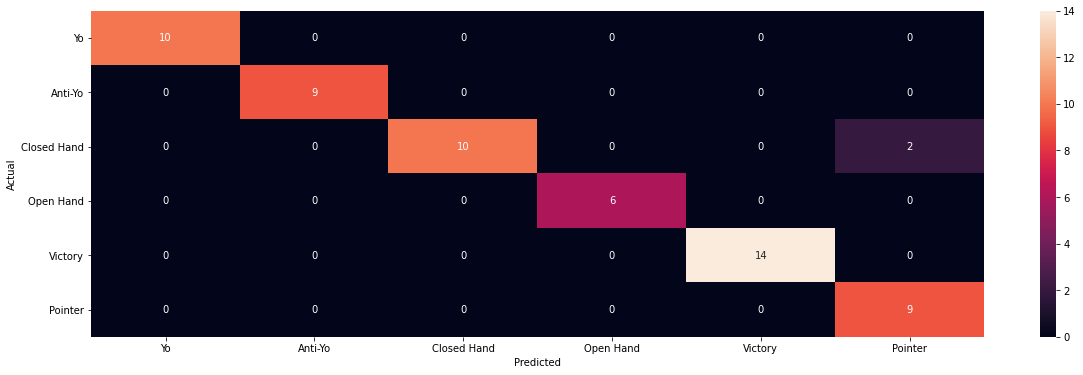

In [149]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = actions, yticklabels = actions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Confusion-matrix of test case

In [150]:
x_find = [[366,293,298,372], [384,202,241,372]]  # Voltage matrix corresponding to Yo-like Gesture
list(model.predict(x_find))

['Yo', 'Open Hand']

### Classification report and Accuracies of model

In [151]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report: 
              precision    recall  f1-score   support

     Anti-Yo       1.00      1.00      1.00        10
 Closed Hand       1.00      1.00      1.00         9
   Open Hand       1.00      0.83      0.91        12
     Pointer       1.00      1.00      1.00         6
     Victory       1.00      1.00      1.00        14
          Yo       0.82      1.00      0.90         9

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

